In [48]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
# changing the datatypes of Invoice = string, Customer ID = string, InvoiceDate = datetime
# Invoice and Customer ID are the key/ID for our dataset

df = pd.read_csv(r"C:\Users\admin\Desktop\refocus\Module 5\5.7 data set\online_retail.csv", parse_dates=['InvoiceDate'],
                dtype ={'Invoice':str,
                        'Customer ID':str
                })
df.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom


In [50]:
print('these are ',len(df),' transactions in our datasets')
df.count()

these are  525461  transactions in our datasets


Invoice        525461
StockCode      525461
Description    522533
Quantity       525461
InvoiceDate    525461
Price          525461
Customer ID    417534
Country        525461
dtype: int64

    # Starting of Data Cleaning By Removing the Cancelled transactions and Null Values

In [51]:
# we have Cancelled transactions that started with letter 'C' in Invoice Column
df.Invoice.str.startswith('C')

0         False
1         False
2         False
3         False
4         False
          ...  
525456    False
525457    False
525458    False
525459    False
525460    False
Name: Invoice, Length: 525461, dtype: bool

In [52]:
# using ~ to change the false into True
~df.Invoice.str.startswith('C')

0         True
1         True
2         True
3         True
4         True
          ... 
525456    True
525457    True
525458    True
525459    True
525460    True
Name: Invoice, Length: 525461, dtype: bool

In [53]:
df.Invoice.str.startswith('C').sum()

10206

In [54]:
# removing now the Cancelled Transactions
df=df[~df.Invoice.str.startswith('C')]
df.count()

Invoice        515255
StockCode      515255
Description    512327
Quantity       515255
InvoiceDate    515255
Price          515255
Customer ID    407695
Country        515255
dtype: int64

In [55]:
# we get the sum of null values in Customer ID
df['Customer ID'].isna().sum()

107560

In [56]:
# drop of null values in Customer ID
df = df.dropna(subset=['Customer ID'])
df.count()

Invoice        407695
StockCode      407695
Description    407695
Quantity       407695
InvoiceDate    407695
Price          407695
Customer ID    407695
Country        407695
dtype: int64

In [57]:
 # Checking the descriptive statistics
df[['Quantity','Price']].describe()

,Quantity,Price
count,407695.000000,407695.000000
mean,13.586686,3.294188
std,96.842229,34.756655
min,1.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,19152.000000,10953.500000


Using the describe function above, we see some descriptive statistics for our variables. Notice that there are also large max quantities and price compared to their 75th percentiles. We can also choose to remove them, but since we have mostly wholesale customers, there is a good chance that these quantities are correct.

In [58]:
df.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom


In [59]:
df[df.Quantity == df.Quantity.max()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
90857,497946,37410,BLACK AND WHITE PAISLEY FLOWER MUG,19152,2010-02-15 11:57:00,0.1,13902,Denmark


In [60]:
df[df.Price == df.Price.max()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
135013,502263,M,Manual,1,2010-03-23 15:22:00,10953.5,12918,United Kingdom


The transaction with a very large quantity is a mug with a price of 0.1. This seems plausible and we can choose to retain this. Similarly, the transaction with the very large price was manually generated (based on the description) and is only 1 quantity. We can also retain this.

datasets are already cleaned by removing nulls and Cancelled transactions if there is an outliers (eg. Quantity & Price should not be negative.
We can now proceed with our main objective which is to provide Cohort Analysis and Explenatory Analysis

1. Count of Invoice and Customers
2. Number of Transactions per Customer
3. Monthly number of transactions

### Count of Invoice and Customers

In [61]:
df.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom


In [62]:
df.Invoice.nunique()

19215

In [63]:
df['Customer ID'].nunique()

4314

We see that we have 19,215 unique transactions across 4,314 customers. This means that each invoice may have multiple stock codes (items).

### Number of Transactions per Customer

In [64]:
# group by Customer ID
# it may be possible to have multiple stock codes in a single invoice
# so we only count the unique Invoice.
df_customer = df.groupby('Customer ID')['Invoice'].nunique()
df_customer.head()

Customer ID
12346    11
12347     2
12348     1
12349     3
12351     1
Name: Invoice, dtype: int64

### Monthly number of customers (loyal customers)

Text(0.5, 0, 'Number of Transactions')

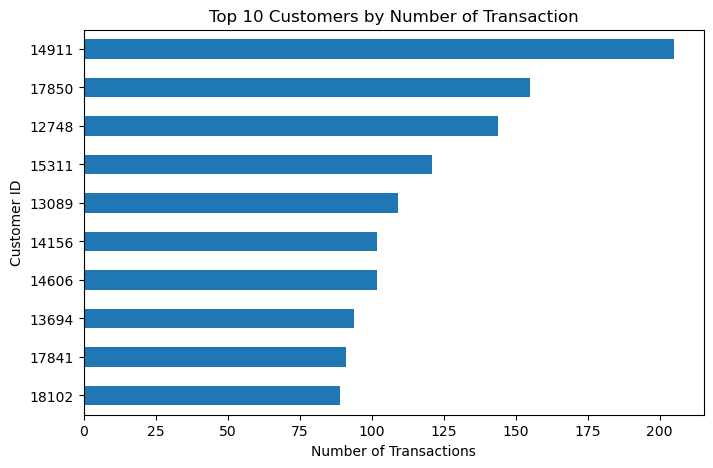

In [65]:
fig, ax = plt.subplots(figsize=(8,5))
df_customer.sort_values(ascending = True).tail(10).plot(kind='barh', ax=ax)
ax.set_title('Top 10 Customers by Number of Transaction')
ax.set_xlabel('Number of Transactions')

From the plot above, we see that our top 10 customers have at least 80 transactions over the range of our dataset (01/12/2009 to 09/12/2011). Our top customer has more than 200 transactions!

### Distribution of our customer transactions

Text(0, 0.5, 'Count of Customers')

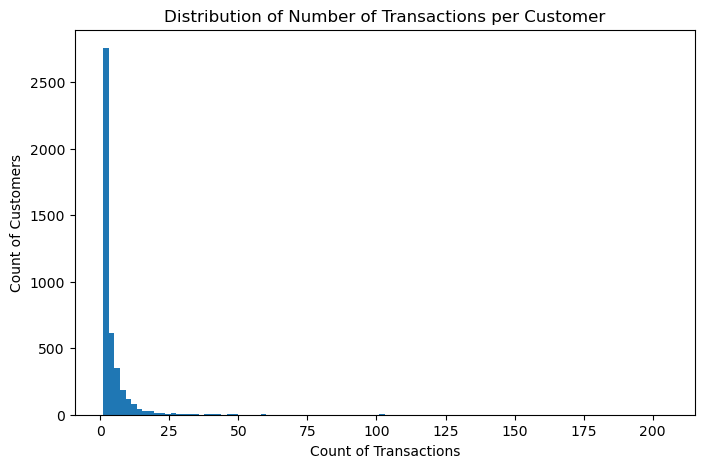

In [66]:
fig, ax = plt.subplots(figsize=(8,5))
df_customer.plot(kind='hist', ax=ax, bins=100)
ax.set_title('Distribution of Number of Transactions per Customer')
ax.set_xlabel('Count of Transactions')
ax.set_ylabel('Count of Customers')

The histogram shows the distribution of our customer transactions. The leftmost bars indicate that we have a large number of customers (>2,500) with only a few transactions (least loyal). We also see some smaller bars in the right tail which tells us that we have a small number of customers with a large number of transactions (most loyal).

### Monthly number of transactions

In [67]:
df.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom


In [68]:
df['Year'] = df.InvoiceDate.dt.year
df['Month'] = df.InvoiceDate.dt.month

In [69]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009,12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009,12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009,12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009,12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009,12


In [70]:
df_monthly = df.groupby(['Year','Month'])['Invoice'].nunique()
df_monthly

Year  Month
2009  12       1512
2010  1        1011
      2        1106
      3        1524
      4        1329
      5        1377
      6        1497
      7        1381
      8        1293
      9        1689
      10       2133
      11       2587
      12        776
Name: Invoice, dtype: int64

Text(0.5, 0, 'Month')

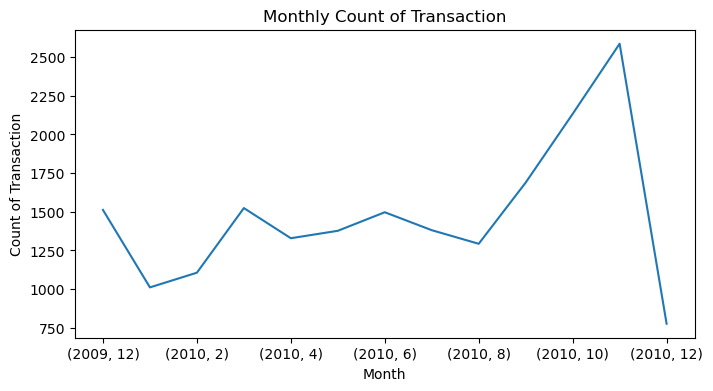

In [71]:
fig, ax = plt.subplots(figsize=(8,4))
df_monthly.plot(ax=ax)
ax.set_title('Monthly Count of Transaction')
ax.set_ylabel('Count of Transaction')
ax.set_xlabel('Month')

We see a couple of interesting findings here.

1. Eventhough the data description states that the transactions ranges from 01/12/2009 to 09/12/2011, we see that we only have transactions up to December 2010. In this case, will continue our analysis with just the 1-year worth of transaction.

2. There is an overall increase in transactions (possible more revenue as well) from the past year. It also shows that transactions peaks towards the end of the year, possibly due to more customers purchasing christmas presents.

COHORT ANALYSIS

After doing a quick data exploration with our data, we can now proceed with the Cohort Analysis.

In this case, we want to get insights based on user retention. To do this, we set the customer cohorts based on the month of their first transactions we then track their purchases throughout the year.

We first select only the relevant columns and drop duplicates (since it is possible to have multiple stock codes per invoice)

In [72]:
df.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009,12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009,12


In [73]:
df_cohorts = df[['Customer ID','Invoice','InvoiceDate']].drop_duplicates()

In [74]:
df_cohorts.head()

,Customer ID,Invoice,InvoiceDate
0,13085,489434,2009-12-01 07:45:00
8,13085,489435,2009-12-01 07:46:00
12,13078,489436,2009-12-01 09:06:00
31,15362,489437,2009-12-01 09:08:00
54,18102,489438,2009-12-01 09:24:00


In [75]:
df_cohorts.count()

Customer ID    19250
Invoice        19250
InvoiceDate    19250
dtype: int64

Next, we create a cohort column based on the first transaction of each customer.

In [76]:
df_first_txn = df_cohorts.groupby('Customer ID')['InvoiceDate'].min().dt.to_period('M')
df_first_txn.name = 'cohort'
df_first_txn = df_first_txn.reset_index()
df_first_txn.head(10)

,Customer ID,cohort
0,12346,2009-12
1,12347,2010-10
2,12348,2010-09
3,12349,2010-04
4,12351,2010-11
5,12352,2010-11
6,12353,2010-10
7,12355,2010-05
8,12356,2010-10
9,12357,2010-11


    Merging the created dataframe with original dataframe

In [77]:
df_first_txn.head(1)

,Customer ID,cohort
0,12346,2009-12


In [78]:
df_cohorts.head(1)

,Customer ID,Invoice,InvoiceDate
0,13085,489434,2009-12-01 07:45:00


In [79]:
df_cohorts = df_cohorts.merge(df_first_txn, how='left', on=['Customer ID'])
df_cohorts.tail(10)

,Customer ID,Invoice,InvoiceDate,cohort
19240,15555,538156,2010-12-09 16:53:00,2009-12
19241,17576,538157,2010-12-09 16:57:00,2009-12
19242,17841,538163,2010-12-09 17:27:00,2009-12
19243,14031,538165,2010-12-09 17:34:00,2009-12
19244,17965,538166,2010-12-09 18:09:00,2009-12
19245,14713,538167,2010-12-09 18:58:00,2009-12
19246,14702,538168,2010-12-09 19:23:00,2009-12
19247,13230,538169,2010-12-09 19:28:00,2010-03
19248,13969,538170,2010-12-09 19:32:00,2010-03
19249,17530,538171,2010-12-09 20:01:00,2009-12


In the sample table above, we see that even if the InvoiceDate is on December 2010, some customers have their first transaction as far back as on December 2009.

Next, we convert the InvoiceDate column to a year-month variable (txn_month)

In [80]:
df_cohorts['txn_month'] = df_cohorts['InvoiceDate'].dt.to_period('M')
df_cohorts.head(5)

,Customer ID,Invoice,InvoiceDate,cohort,txn_month
0,13085,489434,2009-12-01 07:45:00,2009-12,2009-12
1,13085,489435,2009-12-01 07:46:00,2009-12,2009-12
2,13078,489436,2009-12-01 09:06:00,2009-12,2009-12
3,15362,489437,2009-12-01 09:08:00,2009-12,2009-12
4,18102,489438,2009-12-01 09:24:00,2009-12,2009-12


We now have a cohort column corresponding to the year-month of a customers' first transaction and a txn_month column corresponding to the actual year-month of the transaction.

We can now view our cohorts. We group the table by cohort and txn_month and get the counts of unique customer for each cohort.

In [81]:
df_cohorts = df_cohorts.groupby(['cohort','txn_month'])['Customer ID'].nunique()
df_cohorts.name = 'num_customers'
df_cohorts = df_cohorts.reset_index()
df_cohorts.head(10)

,cohort,txn_month,num_customers
0,2009-12,2009-12,955
1,2009-12,2010-01,337
2,2009-12,2010-02,319
3,2009-12,2010-03,406
4,2009-12,2010-04,363
5,2009-12,2010-05,343
6,2009-12,2010-06,360
7,2009-12,2010-07,327
8,2009-12,2010-08,321
9,2009-12,2010-09,346


The resulting table shows the number of customers who had their first purchase in their cohorts and the customers for each succeeding month. For example, their are 346 customers who had their first purchase on December 2009 but they also had a transaction on September 2010.

Let's add a period number column which corresponds to the number of months since their first purchase

In [86]:
# subtract cohort from txn_month, this will result in a MonthEnd pandas datatype
# to get the value as integer, we use the pandas apply function
df_cohorts['period_number'] = (df_cohorts.txn_month - df_cohorts.cohort).apply(lambda x : x.n)
df_cohorts.head(10)

,cohort,txn_month,num_customers,period_number
0,2009-12,2009-12,955,0
1,2009-12,2010-01,337,1
2,2009-12,2010-02,319,2
3,2009-12,2010-03,406,3
4,2009-12,2010-04,363,4
5,2009-12,2010-05,343,5
6,2009-12,2010-06,360,6
7,2009-12,2010-07,327,7
8,2009-12,2010-08,321,8
9,2009-12,2010-09,346,9


Next, we pivot our table to get our cohorts as the index and the period number as the columns. This makes the data easier to visualize and interpret.

In [88]:
df_pivot = df_cohorts.pivot_table(index ='cohort' , columns ='period_number', values ='num_customers')
df_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2009-12,955.0,337.0,319.0,406.0,363.0,343.0,360.0,327.0,321.0,346.0,403.0,473.0,237.0
2010-01,383.0,79.0,119.0,117.0,101.0,115.0,99.0,88.0,107.0,122.0,116.0,38.0,NaN
2010-02,376.0,89.0,84.0,109.0,92.0,75.0,72.0,107.0,95.0,103.0,27.0,NaN,NaN
2010-03,443.0,84.0,102.0,107.0,103.0,90.0,109.0,134.0,122.0,35.0,NaN,NaN,NaN
2010-04,294.0,57.0,57.0,48.0,54.0,66.0,81.0,77.0,20.0,NaN,NaN,NaN,NaN
2010-05,254.0,40.0,43.0,44.0,45.0,65.0,54.0,20.0,NaN,NaN,NaN,NaN,NaN
2010-06,270.0,47.0,51.0,55.0,62.0,77.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07,186.0,29.0,34.0,55.0,54.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,162.0,33.0,48.0,52.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Lastly, we can convert the counts to percentages (% retention) by dividing the values of each row by the the original cohort size (period=0)

In [89]:
# get the original cohort size
# df_orig_cohorts = df_pivot[0]
# df_orig_cohorts
df_orig_cohorts = df_pivot[0]
df_orig_cohorts

cohort
2009-12    955.0
2010-01    383.0
2010-02    376.0
2010-03    443.0
2010-04    294.0
2010-05    254.0
2010-06    270.0
2010-07    186.0
2010-08    162.0
2010-09    243.0
2010-10    377.0
2010-11    325.0
2010-12     46.0
Freq: M, Name: 0, dtype: float64

In [90]:
# divide by original cohort size
df_pivot = df_pivot.divide(df_orig_cohorts, axis =0)
df_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2009-12,1.0,0.352880,0.334031,0.425131,0.380105,0.359162,0.376963,0.342408,0.336126,0.362304,0.421990,0.495288,0.248168
2010-01,1.0,0.206266,0.310705,0.305483,0.263708,0.300261,0.258486,0.229765,0.279373,0.318538,0.302872,0.099217,NaN
2010-02,1.0,0.236702,0.223404,0.289894,0.244681,0.199468,0.191489,0.284574,0.252660,0.273936,0.071809,NaN,NaN
2010-03,1.0,0.189616,0.230248,0.241535,0.232506,0.203160,0.246050,0.302483,0.275395,0.079007,NaN,NaN,NaN
2010-04,1.0,0.193878,0.193878,0.163265,0.183673,0.224490,0.275510,0.261905,0.068027,NaN,NaN,NaN,NaN
2010-05,1.0,0.157480,0.169291,0.173228,0.177165,0.255906,0.212598,0.078740,NaN,NaN,NaN,NaN,NaN
2010-06,1.0,0.174074,0.188889,0.203704,0.229630,0.285185,0.066667,NaN,NaN,NaN,NaN,NaN,NaN
2010-07,1.0,0.155914,0.182796,0.295699,0.290323,0.102151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,1.0,0.203704,0.296296,0.320988,0.117284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We now have our retention matrix. The row index shows the cohort membership and the columns represent the number of months since their first transaction.

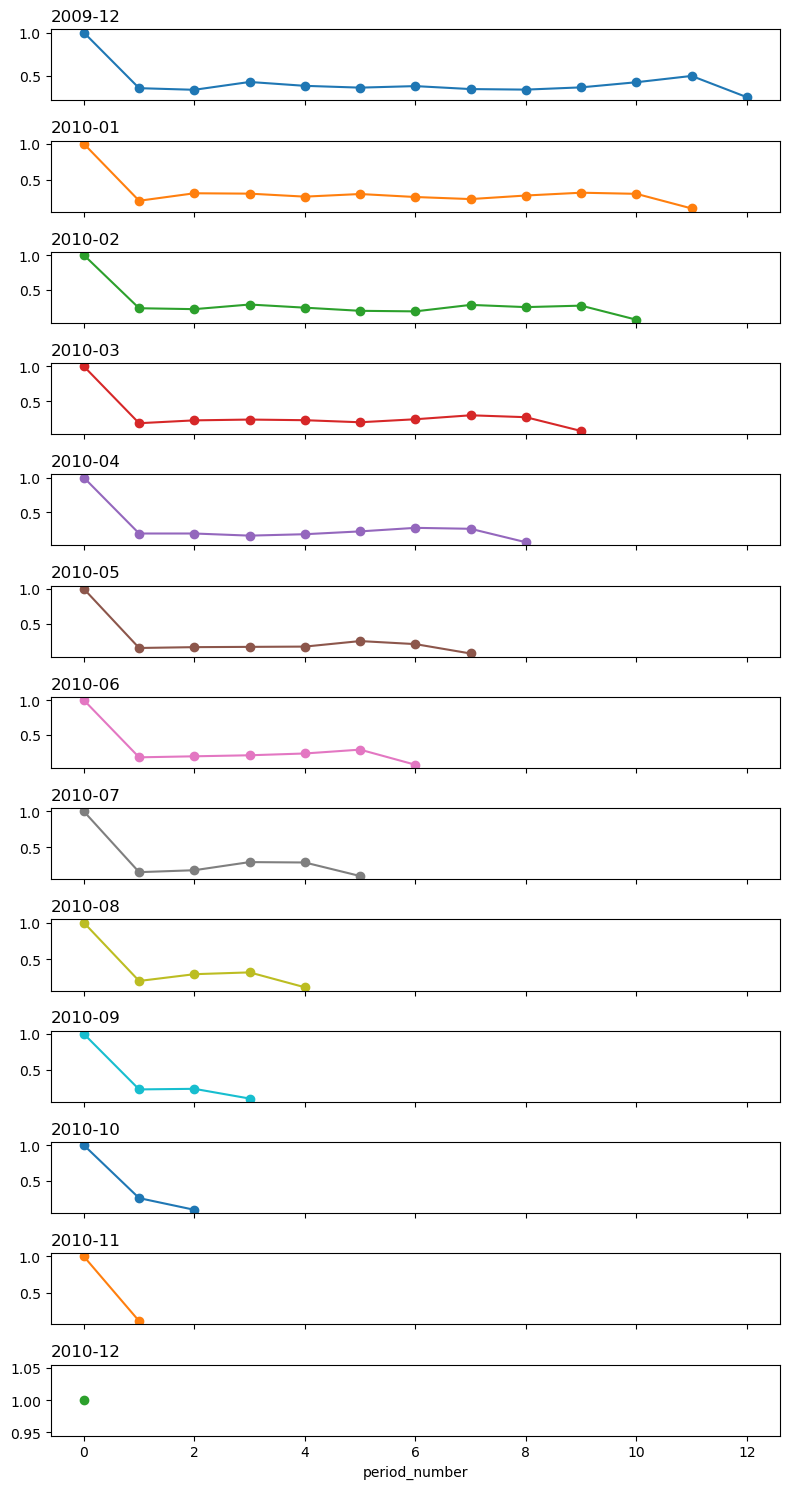

In [94]:
# plot all cohorts in a line
fig, ax = plt.subplots(13, 1, figsize=(8, 15), sharex=True)

df_pivot.T.plot(ax=ax, subplots=True, legend=False, marker='o');

for i, cohort in enumerate(df_pivot.index):
    ax[i].set_title(cohort, loc='left')

fig.tight_layout()
